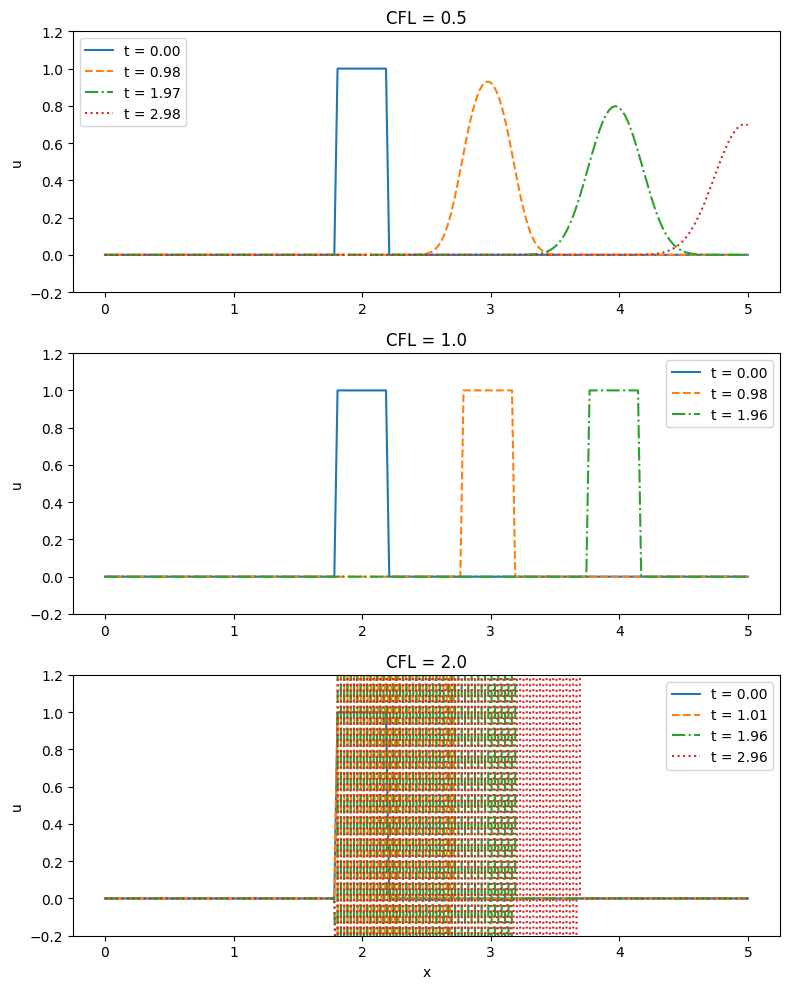

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 5.0              # Length of the domain
Nx = 200             # Number of spatial grid points
x = np.linspace(0, L, Nx)
dx = x[1] - x[0]     # Spatial resolution
a = 1.0              # Advection speed

# CFL values to test
CFL_values = [0.5, 1.0, 2.0]

# Sharp initial condition (step pulse)
def initial_condition(x):
    u = np.zeros_like(x)
    u[(x >= 1.8) & (x <= 2.2)] = 1.0
    return u

# Line styles for each time step
linestyles = ['-', '--', '-.', ':']
capture_times = [0.0, 0.98, 1.97, 2.98]

# Plot for each CFL
fig, axes = plt.subplots(len(CFL_values), 1, figsize=(8, 10))

for idx, CFL in enumerate(CFL_values):
    dt = CFL * dx / a
    T = max(capture_times)
    Nt = int(T / dt)

    u = initial_condition(x)
    snapshots = []

    # Time marching using explicit upwind scheme
    for n in range(Nt + 1):
        current_time = n * dt

        if any(np.isclose(current_time, t, atol=dt/2) for t in capture_times):
            snapshots.append((current_time, u.copy()))

        u_new = u.copy()
        u_new[1:] = u[1:] - CFL * (u[1:] - u[:-1])
        u_new[0] = u[0]  # fixed boundary; change for periodic
        u = u_new

    ax = axes[idx]
    for i, (time_val, u_snap) in enumerate(snapshots):
        ax.plot(x, u_snap, linestyles[i % len(linestyles)], label=f"t = {time_val:.2f}")
    ax.set_title(f"CFL = {CFL}")
    ax.set_ylim(-0.2, 1.2)
    ax.set_ylabel("u")
    ax.legend()
    if idx == len(CFL_values) - 1:
        ax.set_xlabel("x")

plt.tight_layout()
plt.show()
